<a href="https://colab.research.google.com/github/Chromis07/dataStudy/blob/main/ML/Keras/Fashion_MNUST_0~9_%EC%9D%98%EB%A5%98_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

10가지 의류(0~9)를 예측하는 다중 분류 문제

데이터 준비하기

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


데이터 그려보기

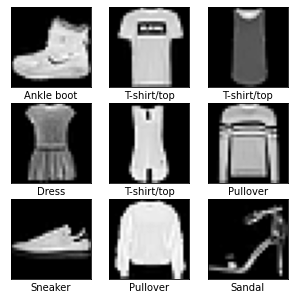

In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

# Fashion-MNIST의 레이블에 해당하는 품목입니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위에서 무작위로 9개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size) 

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

전처리 및 검증 데이터셋 만들기

In [5]:
# 값의 범위를 0~1 사이로 만들기 -> 스케일링 -> minmax 알고리즘

x_train = x_train / 255
x_test = x_test / 255

print(x_train[0])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

In [6]:
# 레이블 (정답지) 범주형 데이터로 변경
from tensorflow.keras.utils import to_categorical

# 실제 정답 비교를 위해 0~9 정답지 따로 저장
real_y_test = y_test

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# 검증 데이터 세트 만들기
from sklearn.model_selection import train_test_split

# train / validation 데이터를 7:3 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.3,
                                                  random_state=777)

첫 번째 모델 구성하기

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

first_model = Sequential()
# Flatten(28, 28)함수 -> .(28 * 28) -> 1차원 784로 변환
first_model.add(Flatten(input_shape=(28,28)))

first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(32,activation='relu'))
first_model.add(Dense(10,activation='softmax'))

첫 번째 모델 설정하기

In [11]:
first_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc']) # accuracy

첫 번째 모델 학습하기

In [12]:
first_history = first_model.fit(x_train, y_train, 
                     epochs=30, 
                     batch_size=128,
                     validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 14s 4ms/step - loss: 2.0290 - acc: 0.3509 - val_loss: 1.0871 - val_acc: 0.5980
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 1.0060 - acc: 0.6353 - val_loss: 0.8292 - val_acc: 0.7044
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.8048 - acc: 0.7148 - val_loss: 0.7209 - val_acc: 0.7412
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.7061 - acc: 0.7451 - val_loss: 0.6615 - val_acc: 0.7598
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.6554 - acc: 0.7638 - val_loss: 0.6188 - val_acc: 0.7718
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.6145 - acc: 0.7736 - val_loss: 0.5925 - val_acc: 0.7836
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.5916 - acc: 0.7819 - val_loss: 0.5780 - val_acc: 0.7858
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0

두 번째 모델 구성하기

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

second_model = Sequential()
# Flatten(28, 28)함수 -> .(28 * 28) -> 1차원 784로 변환
second_model.add(Flatten(input_shape=(28,28))) # (28, 28) -> (28 * 28)

second_model.add(Dense(128, activation='relu')) # 기존 모델보다 128 출력 Dense 층 하나 추가
second_model.add(Dense(64, activation='relu')) # 64개의 출력을 가지는 Dense
second_model.add(Dense(32,activation='relu')) # 32개의 출력을 가지는 Dense
second_model.add(Dense(10,activation='softmax')) # 10개의 출력을 가지는 Dense, 다항 분류를 위한 softmax

second_model.compile(loss='categorical_crossentropy', # 손실함수 : categorical_crossentropy
              optimizer='adam', # 옵티마이저 : Adam
              metrics=['acc']) # accuracy

second_history = first_model.fit(x_train, y_train, 
                     epochs=30, 
                     batch_size=128,
                     validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4178 - acc: 0.8515 - val_loss: 0.4258 - val_acc: 0.8497
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4159 - acc: 0.8517 - val_loss: 0.4227 - val_acc: 0.8506
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4119 - acc: 0.8536 - val_loss: 0.4253 - val_acc: 0.8498
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4097 - acc: 0.8548 - val_loss: 0.4202 - val_acc: 0.8523
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4069 - acc: 0.8547 - val_loss: 0.4159 - val_acc: 0.8548
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4039 - acc: 0.8554 - val_loss: 0.4132 - val_acc: 0.8553
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4019 - acc: 0.8571 - val_loss: 0.4117 - val_acc: 0.8559
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

학습 결과 그려보기

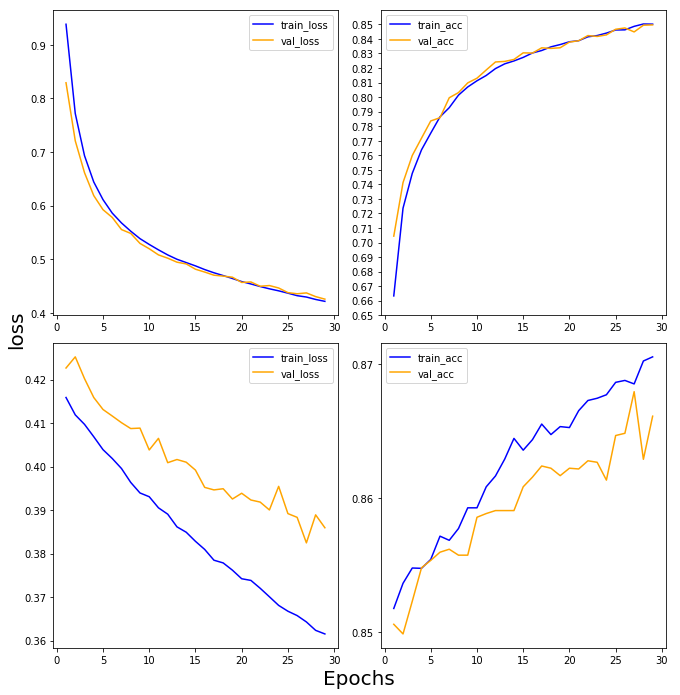

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())
    
    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:],
                     color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:],
                     color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()
    
draw_loss_acc(first_history, second_history, 30)

모델 평가하기

In [26]:
print(first_model.evaluate(x_test, y_test))
print(second_model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.4251 - acc: 0.8494
[0.42508676648139954, 0.849399983882904]
313/313 [==============================] - 1s 1ms/step - loss: 2.3026 - acc: 0.0973
[2.3025102615356445, 0.0982000008225441]


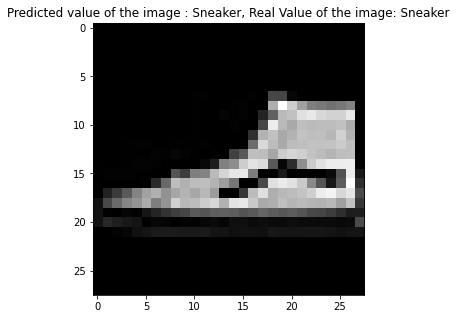

In [29]:
import numpy as np

results = first_model.predict(x_test)
np.set_printoptions(precision=7) # numpy 소수점 제한

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.

import matplotlib.pyplot as plt

sample_size = 10
# 0 ~ 9999의 범위에서 무작위로 정수를 뽑습니다.
random_idx = np.random.randint(10000) 

plt.figure(figsize = (5, 5))
plt.imshow(x_test[random_idx], cmap = 'gray')
plt.title('Predicted value of the image : ' 
          + class_names[arg_results[random_idx]] 
          + ', Real Value of the image: '+class_names[real_y_test[random_idx]])
plt.show()